# Now, we have 
# 1.the 4 job datasets, 
# 2.datasets from kaggle 
# (https://www.kaggle.com/sl6149/data-scientist-job-market-in-the-us
# √https://www.kaggle.com/rkb0023/glassdoor-data-science-jobs
# √https://www.kaggle.com/paulvonhalem/data-science-job-postings
# √https://www.kaggle.com/jayanandenm/glass-door-data-science-jobs
# √https://www.kaggle.com/manish131186/eda-for-data-sciene-job-market-in-us)
# 3.da, ds, ba, and de of indeed


In [311]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

In [312]:
def remove_rep(df, order, subset):
    '''
    df: dataframe
    order: order feature of the dataframe, column name
    subset: subset used to remove duplicates, column name
    '''
    df = df.sort_values(order, ascending=False)
    df = df.drop_duplicates(subset=subset, keep='first')
    return df
def read_d(csv_add):
    df = pd.read_csv(csv_add)
    return df

In [313]:
def indeed_salary(df):
    '''
    for indeed scraped data
    rename columns
    get salary
    drop null of jd
    '''
    df = df.rename(
        columns={'JobTitle': 'Job_Title',
             'Salary': 'Salary_Estimate',
             'Desc': 'Job_Description',
             'Company': 'Company_Name',
             'location': 'Location'})

    pat=re.compile(r'\d+')
    df['Salary_Estimate'] = [str(i).strip() for i in df['Salary_Estimate']]
    sal_df=(df['Salary_Estimate'].str.findall(pat)).apply(pd.Series)
    sal_df.columns=['sal_low','reminder1','sal_up','reminder2']
    df=pd.concat([df,sal_df],axis=1)
    df.drop(columns = ['reminder1', 'reminder2'], inplace = True)
    df.dropna(subset = ['Job_Description'],inplace = True)

    return df

In [314]:
def gd_salary(jobs):
    '''
    get salary
    rename columns
    '''
    pat=re.compile(r'\d+')
    jobs = jobs.rename(
        columns={'Job Title': 'Job_Title',
             'Salary Estimate': 'Salary_Estimate',
             'Job Description': 'Job_Description',
             'Company Name': 'Company_Name',
             'Type of ownership': 'Ownership',
             'Easy Apply': 'Easy_Apply'})
    jobs['Salary_Estimate'] = [str(i).strip(',') for i in jobs['Salary_Estimate']]
    sal_df=(jobs['Salary_Estimate'].str.findall(pat)).apply(pd.Series)
    sal_df.columns=['sal_low','sal_up']
    jobs=pd.concat([jobs,sal_df],axis=1)
    
    return jobs

## Glassdoor datasets 

In [315]:
ba = pd.read_csv('c:/msda/data230/BusinessAnalyst.csv')
ba['category'] = 'ba'
ba.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,category
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,ba
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,ba
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,ba
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,ba
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,ba


In [316]:
# some rows are mismatched (miss the first two feature)
indexs_range = 0 # how many rows are mismacthing
for i in range(len(ba['Unnamed: 0'])):
    if not ba['Unnamed: 0'][i].isdigit():
        indexs_range +=1

dt_fix = ba.iloc[-indexs_range:,:] # sub dataset with the mischating rows
dt_fix.drop(['Competitors','Easy Apply'],axis=1,inplace=True) 
dt_fix.columns = ba.columns[2:] #ignores the first 2 columns names

ba.drop(ba.index[-indexs_range:],axis=0,inplace=True)
ba.drop(['Unnamed: 0','index'],axis=1,inplace=True)
ba = ba.append(dt_fix)
ba = gd_salary(ba)
ba

C:\Users\Rui7803\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,category,sal_low,sal_up
0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,ba,56,102
1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,ba,56,102
2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,ba,56,102
3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,ba,56,102
4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,ba,56,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,ba,66,114
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,ba,66,114
4089,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1,ba,66,114
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1,ba,66,114


In [317]:
ba.shape

(4092, 18)

In [318]:
da = pd.read_csv('c:/msda/data230/DataAnalyst.csv')
da['category'] = 'da'
da.drop(columns = ['Unnamed: 0'], inplace = True)
da.head()
da = gd_salary(da)

In [319]:
de = pd.read_csv('c:/msda/data230/DataEngineer.csv')
de['category'] = 'de'
de.head()
de = gd_salary(de)

In [320]:
ds = pd.read_csv('c:/msda/data230/DataScientist.csv')
ds['category'] = 'ds'
ds.drop(columns = ['Unnamed: 0', 'index'], inplace = True)
ds = gd_salary(ds)

In [321]:
ds.columns

Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy_Apply', 'category', 'sal_low', 'sal_up'],
      dtype='object')

## Other Glassdoor dataset

In [322]:
import glob
#f_add = glob.glob('c:/msda/data230/Jobs/*.csv')
f_add = ['c:/msda/data230/Jobs\\alldata.csv',
 'c:/msda/data230/Jobs\\ds_jobs.csv',
 'c:/msda/data230/Jobs\\glassdoor_jobs (2).csv',
 'c:/msda/data230/Jobs\\glassdoor_jobs.csv']

In [323]:
merge1 = read_d(f_add[0])
merge1.drop(columns = 'reviews', inplace = True)
merge1 = merge1.rename(
    columns={'position': 'Job Title',
             'description': 'Job Description',
             'company': 'Company Name',
             'location': 'Location'})
merge1['cate'] = '1'
merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        6953 non-null   object
 1   Company Name     6953 non-null   object
 2   Job Description  6953 non-null   object
 3   Location         6953 non-null   object
 4   cate             6964 non-null   object
dtypes: object(5)
memory usage: 272.2+ KB


In [324]:
merge2 = read_d(f_add[1])
merge2['cate'] = '2'
merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1051 non-null   object 
 1   Salary Estimate    837 non-null    object 
 2   Job Description    1051 non-null   object 
 3   Rating             1017 non-null   float64
 4   Company Name       1051 non-null   object 
 5   Location           1051 non-null   object 
 6   Headquarters       1040 non-null   object 
 7   Size               1040 non-null   object 
 8   Founded            953 non-null    float64
 9   Type of ownership  1040 non-null   object 
 10  Industry           1011 non-null   object 
 11  Sector             1011 non-null   object 
 12  Revenue            1040 non-null   object 
 13  cate               1051 non-null   object 
dtypes: float64(2), object(12)
memory usage: 115.1+ KB


In [325]:
merge3 = read_d(f_add[2])
merge3.drop(columns = ['Unnamed: 0'], inplace = True)
merge3['cate'] = '3'

merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
 14  cate               956 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 112.2+ KB


In [326]:
merge4 = read_d(f_add[3])
#merge4.drop(columns = ['Unnamed: 0'], inplace = True)
merge4['cate'] = '4'

merge4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1000 non-null   object 
 1   Salary Estimate    1000 non-null   object 
 2   Job Description    1000 non-null   object 
 3   Rating             1000 non-null   float64
 4   Company Name       1000 non-null   object 
 5   Location           1000 non-null   object 
 6   Headquarters       1000 non-null   object 
 7   Size               1000 non-null   object 
 8   Founded            1000 non-null   int64  
 9   Type of ownership  1000 non-null   object 
 10  Industry           1000 non-null   object 
 11  Sector             1000 non-null   object 
 12  Revenue            1000 non-null   object 
 13  Competitors        1000 non-null   object 
 14  cate               1000 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 117.3+ KB


In [327]:
merge = [merge1, merge2, merge3, merge4]
merged_data = pd.concat(merge)
merged_data = gd_salary(merged_data)
merged_data

,Job_Title,Company_Name,Job_Description,Location,cate,Salary_Estimate,Rating,Headquarters,Size,Founded,Ownership,Industry,Sector,Revenue,Competitors,sal_low,sal_up
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA 30301",1,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA",1,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA",1,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303",1,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA",1,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Data Scientist,Shelf Engine\n5.0,• Be one of the first to join our rapidly grow...,"Seattle, WA",4,$105K-$138K (Glassdoor Est.),5.0,"Seattle, WA",1 to 50 employees,-1.0,Company - Private,-1,-1,Unknown / Non-Applicable,-1,105,138
996,Analytic Consultant 4 - Branch Banking Reporti...,Wells Fargo\n3.6,Job Description\n\nImportant Note: During the ...,"Dallas, TX",4,$105K-$138K (Glassdoor Est.),3.6,"San Francisco, CA",10000+ employees,1852.0,Company - Public,Banks & Building Societies,Finance,₹500+ billion (INR),-1,105,138
997,Data Scientist,Fannie Mae\n3.6,"THE COMPANY\n\nFannie Mae provides reliable, l...","Washington, DC",4,$105K-$138K (Glassdoor Est.),3.6,"Washington, DC",5001 to 10000 employees,1938.0,Company - Public,Investment Banking & Asset Management,Finance,₹500+ billion (INR),Freddie Mac,105,138
998,Data Scientist,XSELL Technologies\n3.9,Ready to write the best chapter of your career...,"Chicago, IL",4,$105K-$138K (Glassdoor Est.),3.9,"Chicago, IL",51 to 200 employees,2014.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,105,138


In [328]:
com_data = pd.read_csv('c:/msda/data230/Jobs/combined_job_data.csv')
com_data.drop(columns = ['Unnamed: 0', 'Job_Level', 'State', 'City', 'Work_experience', 'Flag_python', 'Flag_bachelor',
       'Flag_master', 'Flag_sql', 'Flag_ml', 'Flag_r', 'Flag_visualization',
       'Flag_hadoop', 'Flag_big_data', 'Flag_java', 'Flag_tableau',
       'Flag_arc_gis', 'Flag_nlp', 'Flag_database', 'reviews'], inplace = True)
com_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19469 entries, 0 to 19468
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job_Title        19458 non-null  object 
 1   Salary_Estimate  12505 non-null  object 
 2   Job_Description  19458 non-null  object 
 3   Rating           12505 non-null  float64
 4   Company_Name     19456 non-null  object 
 5   Location         19458 non-null  object 
 6   Headquarters     12505 non-null  object 
 7   Size             12505 non-null  object 
 8   Founded          12505 non-null  float64
 9   Ownership        12505 non-null  object 
 10  Industry         12505 non-null  object 
 11  Sector           12505 non-null  object 
 12  Revenue          12505 non-null  object 
 13  Competitors      12505 non-null  object 
 14  Easy_Apply       12505 non-null  object 
 15  category         12505 non-null  object 
 16  sal_low          12505 non-null  float64
 17  sal_up      

C:\Users\Rui7803\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,7,8,10,11,12,13,14,15,16,17,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Add indeed DA&DS

In [329]:
df1 = pd.read_excel("c:/msda/data230/Jobs/indeed/DA.xlsx")
df1.dropna(subset = ['Desc'],inplace = True)
df1['category'] = 'da'
df1 = indeed_salary(df1)
df2

,Job_Title,Company_Name,Location,PostDate,ExtractDate,Salary_Estimate,Job_Description,sal_low,sal_up,category
0,Data Scientist II,Cox Automotive,"Atlanta, GA",29 days ago,2020-09-24,nan,"Primary Location: 3003 Summit Blvd, Atlanta, G...",NaN,NaN,ds
1,Data Scientist,ThreeBridge Solutions,"Atlanta, GA",1 day ago,2020-09-24,nan,Threebridge Solutions has an immediate need fo...,NaN,NaN,ds
2,Machine Learning,Enhance IT,"Atlanta, GA",8 days ago,2020-09-24,"$100,000 - $110,000 a year",Enhance IT is a technology consulting and solu...,100,110,ds
3,Strategic Analytics â€“ Data Scientist,Deloitte,"Atlanta, GA",28 days ago,2020-09-24,nan,Deloitte Services LP includes internal support...,NaN,NaN,ds
4,Data Scientist II,Microsoft,"Atlanta, GA",5 days ago,2020-09-24,nan,"Do you have a passion for data, machine learni...",NaN,NaN,ds
...,...,...,...,...,...,...,...,...,...,...
3511,Senior Product Manager Technical- AWS Machine ...,Amazon.com Services LLC,"Seattle, WA",30+ days ago,2020-09-24,nan,Must have shipped a customer- or developer-fac...,NaN,NaN,ds
3512,Machine Learning Scientist,OSI Engineering,"Seattle, WA",30+ days ago,2020-09-24,nan,JOB DESCRIPTION:\n\nSeeking a Machine Learning...,NaN,NaN,ds
3513,"Principal Product Manager - Technical, Compute...",Amazon.com Services LLC,"Seattle, WA",30+ days ago,2020-09-24,nan,"Bachelorâ€™s degree in Computer Science, Elect...",NaN,NaN,ds
3514,"Sr. Product Manager - Technical, Alexa AI Dist...",Amazon.com Services LLC,"Seattle, WA",30+ days ago,2020-09-24,nan,Bachelor's Degree5+ years of experience in pro...,NaN,NaN,ds


In [330]:
df2 = pd.read_excel("c:/msda/data230/Jobs/indeed/DataScientist.xlsx")
df2 = indeed_salary(df2)
df2['category'] = 'ds'
#df2.dropna(subset = ['Job Description'],inplace = True)
df2

,Job_Title,Company_Name,Location,PostDate,ExtractDate,Salary_Estimate,Job_Description,sal_low,sal_up,category
0,Data Scientist II,Cox Automotive,"Atlanta, GA",29 days ago,2020-09-24,nan,"Primary Location: 3003 Summit Blvd, Atlanta, G...",NaN,NaN,ds
1,Data Scientist,ThreeBridge Solutions,"Atlanta, GA",1 day ago,2020-09-24,nan,Threebridge Solutions has an immediate need fo...,NaN,NaN,ds
2,Machine Learning,Enhance IT,"Atlanta, GA",8 days ago,2020-09-24,"$100,000 - $110,000 a year",Enhance IT is a technology consulting and solu...,100,110,ds
3,Strategic Analytics â€“ Data Scientist,Deloitte,"Atlanta, GA",28 days ago,2020-09-24,nan,Deloitte Services LP includes internal support...,NaN,NaN,ds
4,Data Scientist II,Microsoft,"Atlanta, GA",5 days ago,2020-09-24,nan,"Do you have a passion for data, machine learni...",NaN,NaN,ds
...,...,...,...,...,...,...,...,...,...,...
3511,Senior Product Manager Technical- AWS Machine ...,Amazon.com Services LLC,"Seattle, WA",30+ days ago,2020-09-24,nan,Must have shipped a customer- or developer-fac...,NaN,NaN,ds
3512,Machine Learning Scientist,OSI Engineering,"Seattle, WA",30+ days ago,2020-09-24,nan,JOB DESCRIPTION:\n\nSeeking a Machine Learning...,NaN,NaN,ds
3513,"Principal Product Manager - Technical, Compute...",Amazon.com Services LLC,"Seattle, WA",30+ days ago,2020-09-24,nan,"Bachelorâ€™s degree in Computer Science, Elect...",NaN,NaN,ds
3514,"Sr. Product Manager - Technical, Alexa AI Dist...",Amazon.com Services LLC,"Seattle, WA",30+ days ago,2020-09-24,nan,Bachelor's Degree5+ years of experience in pro...,NaN,NaN,ds


In [331]:
df3 = pd.read_csv("c:/msda/data230/Jobs/indeed/all_updated.csv")# BA
df3 = indeed_salary(df3)
df3['category'] = 'ba'
df3.dropna(subset = ['Job_Description'],inplace = True)
#df3.drop(columns = ['Unnamed: 0'], inplace = True)
df3

,Unnamed: 0,Job_Title,Company_Name,Location,PostDate,ExtractDate,Salary_Estimate,JobUrl,Job_Description,sal_low,sal_up,category
0,0,Business Analyst 963,V-Tech Solution,"Montgomery, AL",Just posted,2020-09-25,$33 - $38 an hour,https://www.indeed.com/company/V--Tech-Solutio...,Job title: Business Analyst (369)Location: Mon...,33,NaN,ba
1,1,Financial Planning & Business Analyst,Confidential,"Hoover, AL",3 days ago,2020-09-25,nan,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,"EXPERIENCE, EDUCATION and SKILLS REQUIREDA fou...",NaN,NaN,ba
2,2,Business Analyst,Robert Half,"Vance, AL",9 days ago,2020-09-25,$38 - $44 an hour,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Robert Half Accountemps has a long term contra...,38,NaN,ba
3,3,Business Analyst 369,Integrated Computer Solutions Inc,"Montgomery, AL",Just posted,2020-09-25,nan,https://www.indeed.com/rc/clk?jk=aa6698b874e8b...,We believe that every Team Member makes a diff...,NaN,NaN,ba
4,4,Business Analyst 369,Integrated Computer Solutions,"Montgomery, AL",Today,2020-09-25,nan,https://www.indeed.com/rc/clk?jk=5ab55dcddc493...,We believe that every Team Member makes a diff...,NaN,NaN,ba
...,...,...,...,...,...,...,...,...,...,...,...,...
19413,22289,Salesforce Sales/Service/Communities Architect,A5,United States,4 days ago,2020-09-25,nan,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Salesforce Sales Cloud/Communities ArchitectWo...,NaN,NaN,ba
19415,22291,Systems and Infrastructure Specialist ll,State of Wyoming,"Cheyenne, WY",Today,2020-09-25,$23.38 - $30.13 an hour,https://www.indeed.com/rc/clk?jk=a1ad67e7a33c7...,Description and Functions\n\nOpen Until Filled...,23,30,ba
19416,22292,Fraud Operations Analyst,Glacier Bancorp,"Wheatland, WY",3 days ago,2020-09-25,nan,https://www.indeed.com/rc/clk?jk=980ca30193ae5...,About the Role\nThe Fraud Operations Analyst w...,NaN,NaN,ba
19418,22294,Database Marketing Manager (Operations Analyst),Pearson,"Cheyenne, WY",30+ days ago,2020-09-25,nan,https://www.indeed.com/rc/clk?jk=268e7adbeb7fd...,Description\nWe are the world’s learning compa...,NaN,NaN,ba


In [332]:
df4 = pd.read_csv("c:/msda/data230/Jobs/indeed/data_engineer.csv")# BA
df4 = indeed_salary(df4)
df4['category'] = 'de'
df4.dropna(subset = ['Job_Description'],inplace = True)
#df4.drop(columns = ['Unnamed: 0'], inplace = True)
df4

,Job_Title,Company_Name,Location,PostDate,ExtractDate,Salary_Estimate,Job_Description,sal_low,sal_up,category
0,DCYF PDG Data Engineer - Olympia,"State of Washington Dept of Children, Youth, a...","Olympia, WA",Today,2020-09-24,"$6,462 - $8,479 a month","Description\n\n\nThe Department of Children, Y...",6,8,de
1,Data Engineer,Amazon.com Services LLC,"Seattle, WA",1 day ago,2020-09-24,nan,Experience with scripting languages like Pytho...,NaN,NaN,de
2,"BI Developer, Data Engineer",Microsoft,"Redmond, WA",2 days ago,2020-09-24,nan,… Join our team and make the world better for ...,NaN,NaN,de
3,Data Engineer,"iSpot.tv, Inc.","Bellevue, WA",5 days ago,2020-09-24,nan,iSpot.tv is a fast-growing venture backed star...,NaN,NaN,de
4,"Engineer, Data (Bank Charter)",SoFi,"Seattle, WA",7 days ago,2020-09-24,nan,Who we are\nSoFi is a digital personal finance...,NaN,NaN,de
...,...,...,...,...,...,...,...,...,...,...
11594,"Operations, Test, and Evaluation Specialist 4",Digiflight,"Huntsville, AL",30+ days ago,2020-09-25,nan,Qualifications:\nMust possess a Bachelor’s Deg...,NaN,NaN,de
11595,Intermediate Interoperability Engineer (#1426025),PeopleTec,"Huntsville, AL",30+ days ago,2020-09-25,nan,PeopleTec is currently seeking an Intermediate...,NaN,NaN,de
11596,Civil Engineer,Tlingit Haida Tribal Business Corporation,"Huntsville, AL",30+ days ago,2020-09-25,nan,Tlingit Haida Tribal Business Corporation (THT...,NaN,NaN,de
11597,Big Data Systems Administrator Active DoD clea...,"MEI Technologies, Inc.","Huntsville, AL",12 days ago,2020-09-25,nan,Overview:\n\nMEI Technologies is growing! MEIT...,NaN,NaN,de


In [333]:
frames = [com_data, df1, df2, df3, df4, merged_data]

jobs = pd.concat(frames )
jobs.dropna(subset = ['Job_Title'], inplace = True)
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62804 entries, 0 to 999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job_Title        62804 non-null  object 
 1   Salary_Estimate  55851 non-null  object 
 2   Job_Description  62804 non-null  object 
 3   Rating           15478 non-null  float64
 4   Company_Name     62799 non-null  object 
 5   Location         62804 non-null  object 
 6   Headquarters     15501 non-null  object 
 7   Size             15501 non-null  object 
 8   Founded          15414 non-null  float64
 9   Ownership        15501 non-null  object 
 10  Industry         15472 non-null  object 
 11  Sector           15472 non-null  object 
 12  Revenue          15501 non-null  object 
 13  Competitors      14461 non-null  object 
 14  Easy_Apply       12505 non-null  object 
 15  category         45891 non-null  object 
 16  sal_low          18979 non-null  object 
 17  sal_up        

In [334]:
# jobs.to_excel('Jobs_gd_ind.xlsx', sheet_name='Sheet1')

In [335]:
n = 0
for i in jobs['Location']:
    if (isinstance(i, str)):
        n+=1
n

62804

In [336]:
add_col_name = []
add_col = []

In [337]:
'''def location(loc):
    city = re.match('([A-Z][A-Za-z ]+), ', loc)
    state = re.match(', ([A-Z]{2})', loc)
    if city:
        city = city[0].strip()
    if state:
        state = state[0]
    return (state, city)
l_state = []
l_city = []
for i in jobs['Location']:
    state, city = location(i)
    l_state.append(state)
    l_city.append(city)
add_col_name.append('State')
add_col.append(l_state)
add_col_name.append('City')
add_col.append(l_city)'''

"def location(loc):\n    city = re.match('([A-Z][A-Za-z ]+), ', loc)\n    state = re.match(', ([A-Z]{2})', loc)\n    if city:\n        city = city[0].strip()\n    if state:\n        state = state[0]\n    return (state, city)\nl_state = []\nl_city = []\nfor i in jobs['Location']:\n    state, city = location(i)\n    l_state.append(state)\n    l_city.append(city)\nadd_col_name.append('State')\nadd_col.append(l_state)\nadd_col_name.append('City')\nadd_col.append(l_city)"

In [338]:
def location(loc):
    try:
        int(loc[-5:])
        loc = loc[:-6]
    except:
        loc = loc
    n = len(loc)
    state = loc[n-2:n]
    city = loc[:n-4]
    return (state, city)

l_state = []
l_city = []
for i in jobs['Location']:
    state, city = location(i)
    l_state.append(state)
    l_city.append(city)
add_col_name.append('State')
add_col.append(l_state)
add_col_name.append('City')
add_col.append(l_city)


In [339]:
def work_experience(job_d):
    match_l = re.findall('(\d{1,2})[-]?\d?\d?[+]? years \w{2,20} experience', job_d)
    if match_l:
        result = int(match_l[0])
    else:
        result = 'NA'
    return result
w_years = []
for i in jobs['Job_Description']:
    w_years.append(work_experience(i))
add_col_name.append('Work_experience')
add_col.append(w_years)

In [340]:
len(w_years)

62804

In [341]:
#for i in jobs['Job_Description']:
#    r_m = re.findall('\d{1,2}[-]?\d?\d?[+]? years \w{2,20} experience',i)
#    print(r_m)

In [342]:
def flag_python(job_d):
    find = re.findall('[Pp]ython', job_d)
    # return (1 if f == 1 else 0)
    if find:
        f = 1
    else:
        f = 0
    return f 

p_req = []
for i in jobs['Job_Description']:
    p_f = flag_python(i)
    p_req.append(p_f)
add_col_name.append('Flag_python')
add_col.append(p_req)

In [343]:
def flag_d(job_d):
    #find1 = re.findall('', job_d)
    find2 = re.findall('''[Dd]octor's [Dd]egree''', job_d)
    find3 = re.findall('[Dd]octoral [Dd]egree', job_d)
    find4 = re.findall('[dD]octorates', job_d)
    #find5 = 
    # return (1 if f == 1 else 0)
    if find2 or find3 or find4:
        f = 1
    else:
        f = 0
    return f 

d_req = []
for i in jobs['Job_Description']:
    d_f = flag_d(i)
    d_req.append(d_f)
add_col_name.append('Flag_phd')
add_col.append(d_req)
sum(d_req)/len(d_req)

0.004442392204318196

In [344]:
def flag_bachelor(job_d):
    find1 = re.findall('[Bb]achelor', job_d)
    find2 = re.findall('B.?S.?', job_d)
    find3 = re.findall('4 [Yy]ear [Dd]egree', job_d)
    if find1 or find2 or find3:
        b_f = 1
    else:
        b_f = 0
    return b_f

b_req = []
for i in jobs['Job_Description']:
    b_f = flag_bachelor(i)
    b_req.append(b_f)
sum(b_req)/len(b_req)
add_col_name.append('Flag_bachelor')
add_col.append(b_req)

In [345]:
def flag_master(job_d):
    find = re.findall('[Mm]aster', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

m_req = []
for i in jobs['Job_Description']:
    m_f = flag_master(i)
    m_req.append(m_f)
add_col_name.append('Flag_master')
add_col.append(m_req)
sum(m_req)/len(m_req)

0.23270810776383669

In [346]:
def flag_sql(job_d):
    find = re.findall('[Ss][Qq][Ll]', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

s_req = []
for i in jobs['Job_Description']:
    s_f = flag_sql(i)
    s_req.append(s_f)
add_col_name.append('Flag_sql')
add_col.append(s_req)
sum(s_req)/len(s_req)

0.3422552703649449

In [347]:
def flag_ml(job_d):
    find = re.findall('[Mm]achine [Ll]earning', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

ml_req = []
for i in jobs['Job_Description']:
    ml_f = flag_ml(i)
    ml_req.append(ml_f)
add_col_name.append('Flag_ml')
add_col.append(ml_req)
sum(ml_req)/len(ml_req)

0.1972485828928094

In [348]:
def flag_r(job_d):
    find = re.findall(' [/]?[Rr][/,]? ', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

r_req = []
for i in jobs['Job_Description']:
    r_f = flag_r(i)
    r_req.append(r_f)
add_col_name.append('Flag_r')
add_col.append(r_req)
sum(r_req)/len(r_req)

0.12546971530475765

In [349]:
def flag_v(job_d):
    find = re.findall('[Dd]ata [Vv]isualization', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

v_req = []
for i in jobs['Job_Description']:
    v_f = flag_v(i)
    v_req.append(v_f)
add_col_name.append('Flag_visualization')
add_col.append(v_req)
sum(v_req)/len(v_req)

0.0880676390038851

In [350]:
def flag_h(job_d):
    find = re.findall('[Hh]adoop', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

h_req = []
for i in jobs['Job_Description']:
    h_f = flag_h(i)
    h_req.append(h_f)
add_col_name.append('Flag_hadoop')
add_col.append(h_req)
sum(h_req)/len(h_req)

0.07754283166677281

In [351]:
def flag_b(job_d):
    find = re.findall('[Bb]ig [Dd]ata', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

b_req = []
for i in jobs['Job_Description']:
    b_f = flag_b(i)
    b_req.append(b_f)
add_col_name.append('Flag_big_data')
add_col.append(b_req)
sum(b_req)/len(b_req)

0.09957964460862366

In [352]:
def flag_j(job_d):
    find = re.findall('[Jj]ava', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

j_req = []
for i in jobs['Job_Description']:
    j_f = flag_j(i)
    j_req.append(j_f)
add_col_name.append('Flag_java')
add_col.append(j_req)
sum(j_req)/len(j_req)

0.14050060505700274

In [353]:
def flag_t(job_d):
    find = re.findall('[Tt]ableau', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

t_req = []
for i in jobs['Job_Description']:
    t_f = flag_t(i)
    t_req.append(t_f)
add_col_name.append('Flag_tableau')
add_col.append(t_req)
sum(t_req)/len(t_req)

0.12239666263295332

In [354]:
'''def flag_gis(job_d):
    find = re.findall('[Aa]rc ?[Gg][Ii][Ss]', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

gis_req = []
for i in jobs['Job_Description']:
    gis_f = flag_gis(i)
    gis_req.append(gis_f)
add_col_name.append('Flag_arc_gis')
add_col.append(gis_req)
sum(gis_req)/len(gis_req)
0.005641748942172073
Delete'''

"def flag_gis(job_d):\n    find = re.findall('[Aa]rc ?[Gg][Ii][Ss]', job_d)\n    if find:\n        f = 1\n    else:\n        f = 0\n    return f\n\ngis_req = []\nfor i in jobs['Job_Description']:\n    gis_f = flag_gis(i)\n    gis_req.append(gis_f)\nadd_col_name.append('Flag_arc_gis')\nadd_col.append(gis_req)\nsum(gis_req)/len(gis_req)\n0.005641748942172073\nDelete"

In [355]:
def flag_nlp(job_d):
    find1 = re.findall('[Nn][Ll][Pp]', job_d)
    find2 = re.findall('[Nn]atural [Ll]anguage [Pp]rocessing', job_d)
    find3 = re.findall('[Nn]euro-? ?[Ll]inguistic [Pp]rogramming', job_d)
    if find1 or find2 or find3:
        f = 1
    else:
        f = 0
    return f

nlp_req = []
for i in jobs['Job_Description']:
    nlp_f = flag_nlp(i)
    nlp_req.append(nlp_f)
add_col_name.append('Flag_nlp')
add_col.append(nlp_req)
sum(nlp_req)/len(nlp_req)

0.047831348321762945

In [356]:
def flag_db(job_d):
    find = re.findall('[Dd]atabase', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

db_req = []
for i in jobs['Job_Description']:
    db_f = flag_db(i)
    db_req.append(db_f)
add_col_name.append('Flag_database')
add_col.append(db_req)
sum(db_req)/len(db_req)

0.2611776319979619

## ADD DATA MINING AND CONMMUNICATION SKILL Date:0921

In [357]:
def flag_dm(job_d):
    find = re.findall('[Dd]ata [Mm]ining', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

dm_req = []
for i in jobs['Job_Description']:
    dm_f = flag_dm(i)
    dm_req.append(dm_f)
add_col_name.append('Flag_datamining')
add_col.append(dm_req)
sum(dm_req)/len(dm_req)

0.0709349722947583

In [358]:
def flag_c(job_d):
    find = re.findall('[Cc]ommunication [Ss]kill', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

c_req = []
for i in jobs['Job_Description']:
    c_f = flag_c(i)
    c_req.append(c_f)
add_col_name.append('Flag_communication_skill')
add_col.append(c_req)
sum(c_req)/len(c_req)

0.35922871154703523

## Add statistics & problem solving skill Date:0924

In [359]:
def flag_s(job_d):
    find = re.findall('[sS]tatistics', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

s_req = []
for i in jobs['Job_Description']:
    s_f = flag_s(i)
    s_req.append(s_f)
add_col_name.append('Flag_statistics')
add_col.append(s_req)
sum(s_req)/len(s_req)

0.20595821922170562

In [360]:
def flag_ps(job_d):
    find = re.findall('[Pp]roblem [Ss]olve?i?n?g?', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

ps_req = []
for i in jobs['Job_Description']:
    ps_f = flag_ps(i)
    ps_req.append(ps_f)
add_col_name.append('Flag_problemsolving')
add_col.append(ps_req)
sum(ps_req)/len(ps_req)

0.15350933061588434

## Add  AWS,Microsoft Azure,Google Cloud Platform,Databricks,snowflake

In [361]:
def flag_aws(job_d):
    find = re.findall('AWS', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

aws_req = []
for i in jobs['Job_Description']:
    aws_f = flag_aws(i)
    aws_req.append(aws_f)
add_col_name.append('Flag_aws')
add_col.append(aws_req)
sum(aws_req)/len(aws_req)

0.08720782115788803

In [362]:
def flag_azu(job_d):
    find = re.findall(' Azure', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

azu_req = []
for i in jobs['Job_Description']:
    azu_f = flag_azu(i)
    azu_req.append(azu_f)
add_col_name.append('Flag_problemsolving')
add_col.append(azu_req)
sum(azu_req)/len(azu_req)

0.03990191707534552

In [363]:
def flag_Databricks(job_d):
    find = re.findall('Databricks', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

Databricks_req = []
for i in jobs['Job_Description']:
    Databricks_f = flag_Databricks(i)
    Databricks_req.append(Databricks_f)
add_col_name.append('Flag_Databricks')
add_col.append(Databricks_req)
sum(Databricks_req)/len(Databricks_req)

0.004744920705687536

In [364]:
def flag_snowflake(job_d):
    find = re.findall('[Ss]nowflake', job_d)
    if find:
        f = 1
    else:
        f = 0
    return f

snowflake_req = []
for i in jobs['Job_Description']:
    snowflake_f = flag_snowflake(i)
    snowflake_req.append(snowflake_f)
add_col_name.append('Flag_snowflake')
add_col.append(snowflake_req)
sum(snowflake_req)/len(snowflake_req)

0.014250684669766258

In [365]:
job_title_str=' '.join([x for x in jobs['Job_Title']])
tokens = nltk.word_tokenize(job_title_str)
tokens=[x.lower() for x in tokens]

In [366]:
pat_lead=re.compile(r'lead|principal|iii|iv',re.I)
pat_sr=re.compile(r'senior|sr.|sr|ii',re.I)
pat_jr=re.compile(r'junior|jr|jr.|entry|i',re.I)
# from https://www.kaggle.com/andrewhou/data-job-analysis-visualization-using-nlp-rege

In [367]:
def job_title(row):
    if re.match(pat_lead,row['Job_Title']):
        return 'Lead'
    if re.match(pat_sr,row['Job_Title']):
        return 'Senior'
    if re.match(pat_jr,row['Job_Title']):
        return 'Junior'
jobs['Job_Level']=jobs.apply(job_title,axis=1)

In [368]:
jobs['sal_low']=jobs['sal_low'].astype('float')
jobs['sal_up']=jobs['sal_up'].astype('float')
jobs['sal_mean']=(jobs['sal_low']+jobs['sal_up'])/2

In [369]:
for i, j in zip(add_col_name, add_col):
    jobs[i] = pd.Series(j)
jobs.shape
# jobs.to_csv('c:\\msda\\data230\\jobs_v1.csv')

(62804, 49)

In [370]:
jobs.columns

Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy_Apply', 'category', 'sal_low', 'sal_up', 'sal_mean', 'PostDate',
       'ExtractDate', 'Unnamed: 0', 'JobUrl', 'cate', 'Job_Level', 'State',
       'City', 'Work_experience', 'Flag_python', 'Flag_phd', 'Flag_bachelor',
       'Flag_master', 'Flag_sql', 'Flag_ml', 'Flag_r', 'Flag_visualization',
       'Flag_hadoop', 'Flag_big_data', 'Flag_java', 'Flag_tableau', 'Flag_nlp',
       'Flag_database', 'Flag_datamining', 'Flag_communication_skill',
       'Flag_statistics', 'Flag_problemsolving', 'Flag_aws', 'Flag_Databricks',
       'Flag_snowflake'],
      dtype='object')

In [371]:
#jobs.to_csv('c:\\msda\\data230\\jobs_v1.csv')

In [372]:
dict_s = {}
for i in jobs['State']:
    dict_s[i] = dict_s.get(i, 0)+1

In [373]:
dict_s

{'NY': 6862,
 'NJ': 1624,
 'CA': 17252,
 'IL': 5523,
 'TX': 13646,
 'AZ': 3631,
 'PA': 3321,
 'DE': 336,
 'FL': 2110,
 'UT': 289,
 'VA': 431,
 'OH': 501,
 'NC': 629,
 'SC': 20,
 'IN': 160,
 'WA': 1788,
 'GA': 308,
 'KS': 20,
 'CO': 1053,
 'om': 11,
 'A ': 126,
 'MA': 2325,
 'DC': 500,
 'Y ': 333,
 'J ': 5}

In [374]:
sum(dict_s.values())

62804

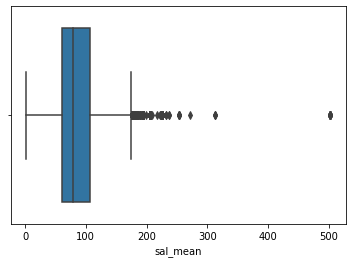

In [375]:
import seaborn as sns
sns.boxplot(jobs['sal_mean'])

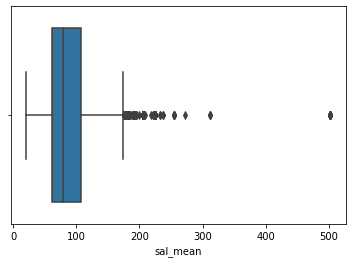

In [376]:
# The salary should be yearly salary
# Some of the salary is mounthly salary or hourly, drop.
def cap(x):
    if 20 > x.min():
        x = x.copy()
        x.loc[x<20] = np.nan
    return(x)
jobs['sal_mean'] = cap(jobs['sal_mean'])

In [377]:
# jobs.drop(columns = ['Job_Description', 'Salary_Estimate', 'sal_low', 'sal_up', 'ExtractDate', 'JobUrl','PostDate'])

In [378]:
jobs.columns

Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy_Apply', 'category', 'sal_low', 'sal_up', 'sal_mean', 'PostDate',
       'ExtractDate', 'Unnamed: 0', 'JobUrl', 'cate', 'Job_Level', 'State',
       'City', 'Work_experience', 'Flag_python', 'Flag_phd', 'Flag_bachelor',
       'Flag_master', 'Flag_sql', 'Flag_ml', 'Flag_r', 'Flag_visualization',
       'Flag_hadoop', 'Flag_big_data', 'Flag_java', 'Flag_tableau', 'Flag_nlp',
       'Flag_database', 'Flag_datamining', 'Flag_communication_skill',
       'Flag_statistics', 'Flag_problemsolving', 'Flag_aws', 'Flag_Databricks',
       'Flag_snowflake'],
      dtype='object')

In [379]:
'''df = jobs
df_ord = df.sort_values('Company_Name', ascending=False)
df = df_ord.drop_duplicates(subset='Job_Title', keep='first')'''

"df = jobs\ndf_ord = df.sort_values('Company_Name', ascending=False)\ndf = df_ord.drop_duplicates(subset='Job_Title', keep='first')"

In [380]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62804 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Job_Title                 62804 non-null  object 
 1   Salary_Estimate           55851 non-null  object 
 2   Job_Description           62804 non-null  object 
 3   Rating                    15478 non-null  float64
 4   Company_Name              62799 non-null  object 
 5   Location                  62804 non-null  object 
 6   Headquarters              15501 non-null  object 
 7   Size                      15501 non-null  object 
 8   Founded                   15414 non-null  float64
 9   Ownership                 15501 non-null  object 
 10  Industry                  15472 non-null  object 
 11  Sector                    15472 non-null  object 
 12  Revenue                   15501 non-null  object 
 13  Competitors               14461 non-null  object 
 14  Easy_App

In [381]:
df_d_replication = jobs.drop_duplicates()
df_d_replication.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62747 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Job_Title                 62747 non-null  object 
 1   Salary_Estimate           55794 non-null  object 
 2   Job_Description           62747 non-null  object 
 3   Rating                    15468 non-null  float64
 4   Company_Name              62742 non-null  object 
 5   Location                  62747 non-null  object 
 6   Headquarters              15491 non-null  object 
 7   Size                      15491 non-null  object 
 8   Founded                   15404 non-null  float64
 9   Ownership                 15491 non-null  object 
 10  Industry                  15462 non-null  object 
 11  Sector                    15462 non-null  object 
 12  Revenue                   15491 non-null  object 
 13  Competitors               14455 non-null  object 
 14  Easy_App

In [382]:
df_d_replication.to_excel('Jobs_sep30_all_drop_duplicates.xlsx', sheet_name='Sheet1')

C:\Users\Rui7803\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:937: UserWarning: Ignoring URL 'https://video.digi-me.com/prudential/jobs/Finance/Customer%20Office/ZP0058
If%20your%20skills%20reside%20at%20the%20intersection%20of%20analytics,%20technology,%20business%20and%20innovation,%20then%20we%20have%20a%20unique%20and%20exciting%20opportunity%20for%20you!
Prudential%20Financial%20is%20looking%20for%20a%20motivated%20Data%20Scientist%20to%20join%20our%20diverse%20team%20of%20Engineers,%20Economists,%20Computer%20Scientists,%20Mathematicians,%20Physicists,%20Statisticians%20and%20Actuaries%20tasked%20with%20mining%20our%20industry-leading%20internal%20data%20to%20develop%20new%20analytics%20capabilities%20for%20our%20businesses.
The%20role%20requires%20a%20rare%20combination%20of%20sophisticated%20analytical%20expertise;%20business%20acumen;%20strategic%20mindset;%20client%20relationship%20skills,%20project%20management;%20and%20a%20passion%20for%20generating%20business%20impa